# SET 3

### Bahador Amjadi
### 2040470

In [1]:
library(ggplot2)
library(reshape2)  #for visualization purpose

Warning message:
"package 'reshape2' was built under R version 3.6.3"

## Exercise 1

In [2]:
triang.func <- function(x, a , b ,c){
    if      (a<=x & x<c)   {output <- (2*(x-a))/((b-a)*(c-a))}
    else if (c<=x & x<=b)  {output <- ((2*(b-x))/((b-a)*(b-c)))}
    else                   {output <- (0)}
    return(output)}


func.plotter <- function(f, a, b, c){
    X    <- seq(a,b,0.01)
    df   <- data.frame(X=X)  
    F <- vector()
    for (x in X){F <- append(F, f(x, a, b, c))}
    df$F <- F   
    max.y <<- max(df$F)
    
    ggplot(data = df, aes(x =X , y = F)) +
    labs(title = "The Triangular Distribution",
    x = "X",
    y = "pdf") +
    geom_line(color='black', lwd=0.7)
    
}

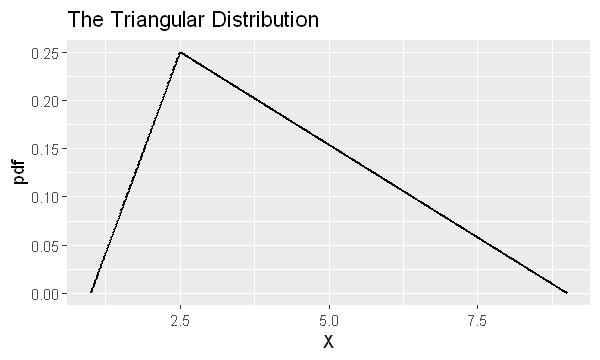

In [3]:
#part a
options(repr.plot.width=5, repr.plot.height =3)  #changing size of plots

func.plotter(triang.func, 1, 9, 2.5)

In [4]:
#part b
set.seed(123)
#We try to use accept-reject method to generate random numbers from this distribution 
random.generator <- function(triang.func, a , b, c){
    
    N     <- 30000           #trying with 30000 points to be sure we have at least 10000 accepted points
    x <- runif(N,a,b)
    y <- runif(N,0,max.y)
    accepted.x <- vector()
    accepted.y <- vector()
    
    for (i in seq(1,N)) {if (y[i] < triang.func(x[i], a, b, c)){
        accepted.x <- append(accepted.x, x[i])
        accepted.y <- append(accepted.y, y[i])
    }}
    
    df <- data.frame(X = accepted.x , Y = accepted.y)
    return(df)
}

In [5]:
df <- random.generator(triang.func, 1, 9, 2.5)

#value generated via triang pdf:
head(df[1])

X
3.300620
4.271815
4.652918
4.626673
6.420565
5.581067


In [6]:
df <- data.frame(x.hist = df[1:10000, 1])  # we keep 10000 samples

In [7]:
X    <- seq(1,9,0.0008)
F <- vector()
for (x in X){F <- append(F, triang.func(x, 1, 9, 2.5))}
df$x.analytic <- F[1:10000]
df$X          <- X[1:10000]

In [8]:
#the final dataframe, ready for plot
head(df)

x.hist,x.analytic,X
3.300620,0.0000000000,1.0000
4.271815,0.0001333333,1.0008
4.652918,0.0002666667,1.0016
4.626673,0.0004000000,1.0024
6.420565,0.0005333333,1.0032
5.581067,0.0006666667,1.0040


Warning message:
"Use of `df$x.hist` is discouraged. Use `x.hist` instead."Warning message:
"Use of `df$X` is discouraged. Use `X` instead."Warning message:
"Use of `df$x.analytic` is discouraged. Use `x.analytic` instead."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


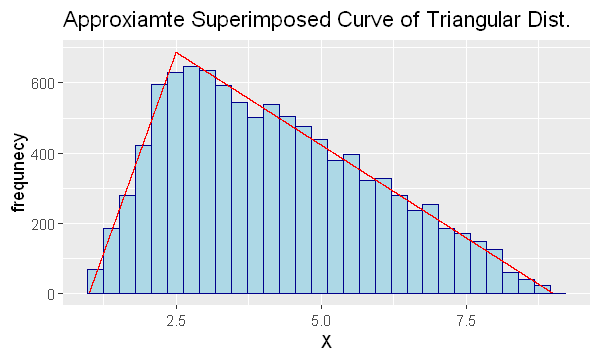

In [9]:
ggplot(df, aes(x=df$x.hist)) +
    geom_histogram( color="darkblue", fill="lightblue") + 
    geom_line(aes(x=df$X , y =2750* df$x.analytic), color = 'red') + 
    labs(title = "Approxiamte Superimposed Curve of Triangular Dist.",
    x = "X",
    y = "frequnecy")

## Exercise 2 - Markov’s inequality

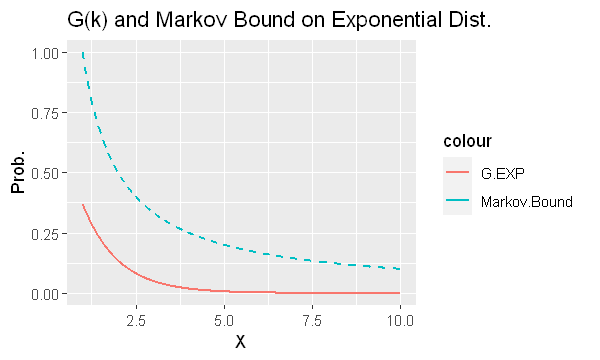

In [10]:
options(repr.plot.width=5, repr.plot.height =3)  #changing size of plots

X    <- seq(1,10,0.01)
DF   <- data.frame(X=X)
Gexp    <- function(){
    Gexp.func <- function(x){return(1- pexp(x,1))}
    exp <- vector()
    for (x in X){exp <- append(exp, Gexp.func(x))}
    DF$G.EXP        <<- exp
    DF$markov.bound <<- (1/X)  #E = 1/lambda = 1
}

Gexp()

ggplot(data = DF, aes(x = X)) +
  geom_line(aes(y = G.EXP, colour = "G.EXP"), lwd=0.7) + 
  geom_line(aes(y = markov.bound, colour = "Markov.Bound"), linetype = "dashed", lwd=0.7) + 
  labs(title = "G(k) and Markov Bound on Exponential Dist.",
         x = "X",
         y = "Prob.")

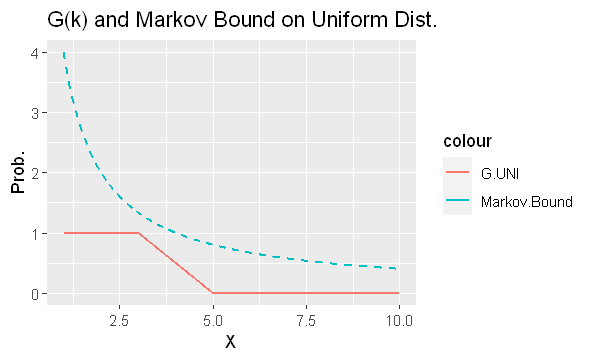

In [11]:
X    <- seq(1,10,0.01)
DF   <- data.frame(X=X)
Guni    <- function(){
    Guni.func <- function(x){return(1- punif(x, min= 3, max= 5))}
    uni <- vector()
    for (x in X){uni <- append(uni, Guni.func(x))}
    DF$G.UNI        <<- uni
    DF$markov.bound <<- (4/X)  #E = (3+5)/2
}

Guni()

ggplot(data = DF, aes(x = X)) +
  geom_line(aes(y = G.UNI, colour = "G.UNI"), lwd=0.7) + 
  geom_line(aes(y = markov.bound, colour = "Markov.Bound"), linetype = "dashed", lwd=0.7) +
  labs(title = "G(k) and Markov Bound on Uniform Dist.",
         x = "X",
         y = "Prob.")

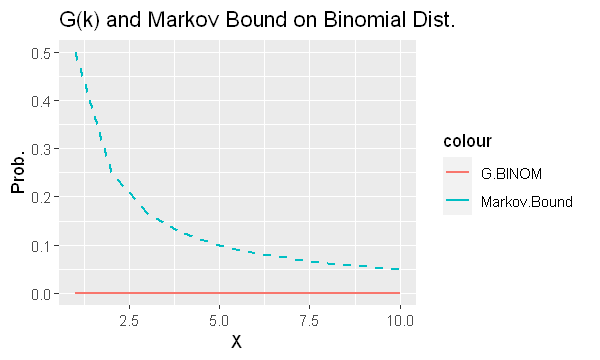

In [12]:
X    <- seq(1,10)
DF   <- data.frame(X=X)   

Gbino    <- function(){
    Gbinom.func <- function(x){return(1- pbinom(x,size = 1,  p = 1/2))}
    binom <- vector()
    for (x in X){binom <- append(binom, Gbinom.func(x))}
    DF$G.BINOM <<- binom
    DF$markov.bound <<- (0.5/X)  #E = n*p = 0.5
}    
Gbino()
       
ggplot(data = DF, aes(x = X)) +
  geom_line(aes(y = G.BINOM     , colour = "G.BINOM"), lwd=0.7) + 
  geom_line(aes(y = markov.bound, colour = "Markov.Bound"), linetype = "dashed", lwd=0.7) +
  labs(title = "G(k) and Markov Bound on Binomial Dist.",
         x = "X",
         y = "Prob.")

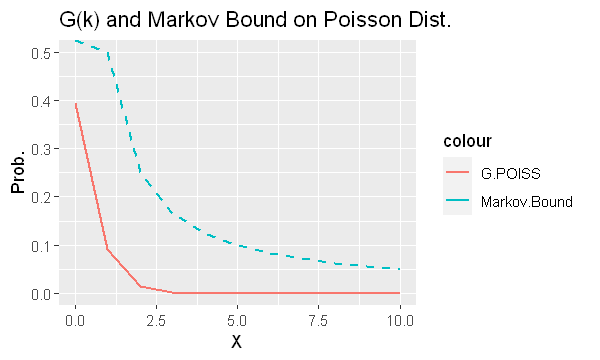

In [13]:
X    <- seq(0,10)
DF   <- data.frame(X=X)

Gpoiss    <- function(){
    Gpois.func <- function(x){return(1- ppois(x, lambda = 1/2))}
    pois <- vector()
    for (x in X){pois <- append(pois, Gpois.func(x))}
    DF$G.POIS       <<- pois
    DF$markov.bound <<- (0.5/X)  #E = lambda = 1/2
}    
Gpoiss()

ggplot(data = DF, aes(x = X)) +
  geom_line(aes(y = G.POIS     , colour = "G.POISS"), lwd=0.7) + 
  geom_line(aes(y = markov.bound, colour = "Markov.Bound"), linetype = "dashed", lwd=0.7) +
  labs(title = "G(k) and Markov Bound on Poisson Dist.",
         x = "X",
         y = "Prob.")

## Exercise 3 - Chebyshev’s inequality

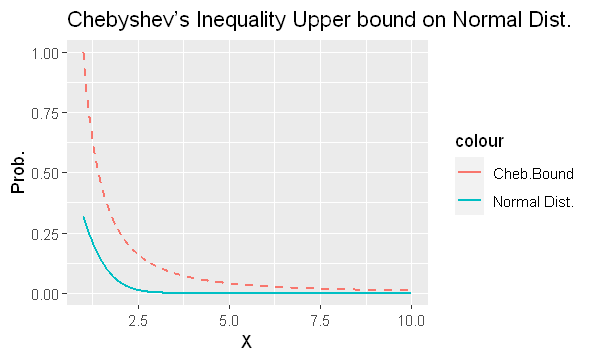

In [14]:
options(repr.plot.width=5, repr.plot.height =3)  #changing size of plots

X     <- seq(1,10,0.01)
DF    <- data.frame(X=X)
sigma <-5 
u     <-3
Gnorm    <- function(){
    Gnorm.func <- function(x){return(1-pnorm(x*sigma+u,mean=u,sd=sigma)+pnorm(u-x*sigma,mean=u,sd=sigma))}
    norm <- vector()
    for (x in X){norm <- append(norm, Gnorm.func(x))}
    DF$G.NORM        <<- norm
    DF$cheb.bound <<- (1/X**2)  
}

Gnorm()

ggplot(data = DF, aes(x = X)) +
  geom_line(aes(y = G.NORM, colour = "Normal Dist."), lwd=0.7) + 
  geom_line(aes(y = cheb.bound, colour = "Cheb.Bound"), linetype = "dashed", lwd=0.7) +
  labs(title = "Chebyshev’s Inequality Upper bound on Normal Dist.",
         x = "X",
         y = "Prob.")

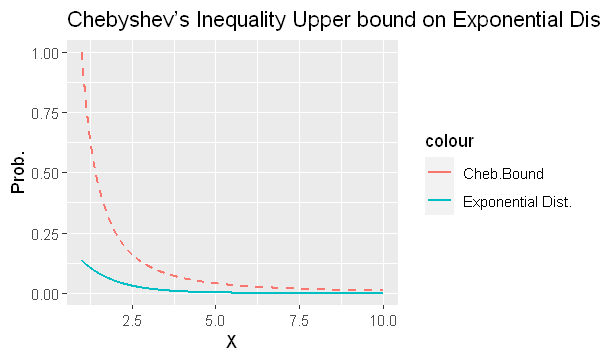

In [15]:
X     <- seq(1,10,0.01)
DF    <- data.frame(X=X)

lambda <- 1  
u      <- 1/lambda
sigma  <- sqrt(1/(lambda**2)) 

Gexp    <- function(){
    Gexp.func <- function(x){return(1-pexp(x*sigma+u,rate=lambda)+pexp(u-x*sigma,rate=lambda))}
    exp <- vector()
    for (x in X){exp <- append(exp, Gexp.func(x))}
    DF$G.EXP       <<- exp
    DF$cheb.bound <<- (1/X**2)  
}

Gexp()

ggplot(data = DF, aes(x = X)) +
  geom_line(aes(y = G.EXP, colour = "Exponential Dist."), lwd=0.7) + 
  geom_line(aes(y = cheb.bound, colour = "Cheb.Bound"), linetype = "dashed", lwd=0.7) +
  labs(title = "Chebyshev’s Inequality Upper bound on Exponential Dist.",
         x = "X",
         y = "Prob.")

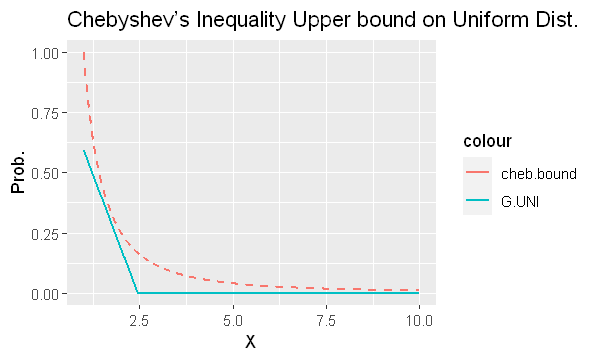

In [16]:
X     <- seq(1,10,0.01)
DF    <- data.frame(X=X)

a     <- 1-sqrt(2)
b     <- 1+sqrt(2)
sigma <- sqrt(((a+b)**2)/12)
u     <- (a+b)/2 

Guni    <- function(){
    Guni.func <- function(x){return(1-punif(x*sigma+u,min=a,max=b)+punif(u-x*sigma,min=a,max=b))}
    uni <- vector()
    for (x in X){uni <- append(uni, Guni.func(x))}
    DF$G.UNI       <<- uni
    DF$cheb.bound  <<- (1/X**2)  
}

Guni()

ggplot(data = DF, aes(x = X)) +
  geom_line(aes(y = G.UNI, colour = "G.UNI"), lwd=0.7) + 
  geom_line(aes(y = cheb.bound, colour = "cheb.bound"), linetype = "dashed", lwd=0.7) +
  labs(title = "Chebyshev’s Inequality Upper bound on Uniform Dist.",
         x = "X",
         y = "Prob.")

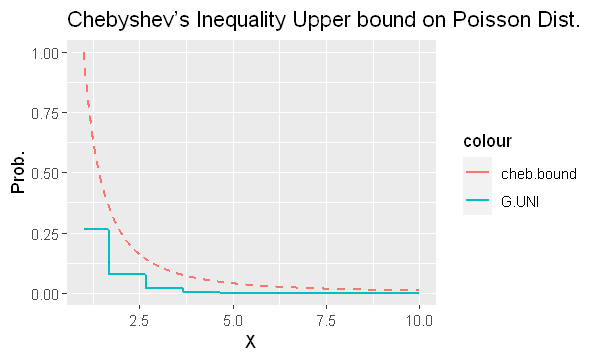

In [17]:
X     <- seq(1,10,0.01)
DF    <- data.frame(X=X)

lamda <- 1/3
u     <- lamda       # in poisson dis. 
sigma <- sqrt(lambda)   

Gpois    <- function(){
    Gpois.func <- function(x){return(1-ppois(x*sigma+u,lambda=lambda)+ppois(u-x*sigma,lambda=lamda))}
    pois <- vector()
    for (x in X){pois <- append(pois, Gpois.func(x))}
    DF$G.POIS      <<- pois
    DF$cheb.bound  <<- (1/X**2)  
}

Gpois()

ggplot(data = DF, aes(x = X)) +
  geom_line(aes(y = G.POIS, colour = "G.UNI"), lwd=0.7) + 
  geom_line(aes(y = cheb.bound, colour = "cheb.bound"), linetype = "dashed", lwd=0.7) + 
  labs(title = "Chebyshev’s Inequality Upper bound on Poisson Dist.",
         x = "X",
         y = "Prob.")

## Exercise 4 - Six Boxes Toy Model : Inference

In [18]:
df    <- data.frame(N=0, H0=1/6 , H1=1/6 , H2=1/6 , H3=1/6 , H4=1/6 , H5=1/6)
prob  <- rep(1/6, 6)
j     <- c(0,1,2,3,4,5)
state <- 0
N     <- 0  #counting the number of tries

while (state != 'exit'){
    color <- readline(prompt = "Ball Extraction 1 (white) or 0 (black) or exit:")

    if      (color == 1){prob <- (j/5 * prob)/sum(j/5 * prob)}
    else if (color == 0){prob <- ((5-j)/5) * prob / sum(((5-j)/5) *prob)}
    else    {break}
    
    N <- N+1
    df[nrow(df) + 1,1:7] <- c(N,prob)}

Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:0
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:0
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (w

In [26]:
head(df)

N,H0,H1,H2,H3,H4,H5
0,0.1666667,0.1666667,0.1666667,0.16666667,0.16666667,0.1666667
1,0.3333333,0.2666667,0.2000000,0.13333333,0.06666667,0.0000000
2,0.4545455,0.2909091,0.1636364,0.07272727,0.01818182,0.0000000
3,0.0000000,0.3200000,0.3600000,0.24000000,0.08000000,0.0000000
4,0.0000000,0.3200000,0.3600000,0.24000000,0.08000000,0.0000000
5,0.0000000,0.4383562,0.3698630,0.16438356,0.02739726,0.0000000


In [27]:
tail(df, n= 1) #printing the final set of values

,N,H0,H1,H2,H3,H4,H5
21,20,0,0.8858152,0.1122376,0.001946371,8.447792e-07,0


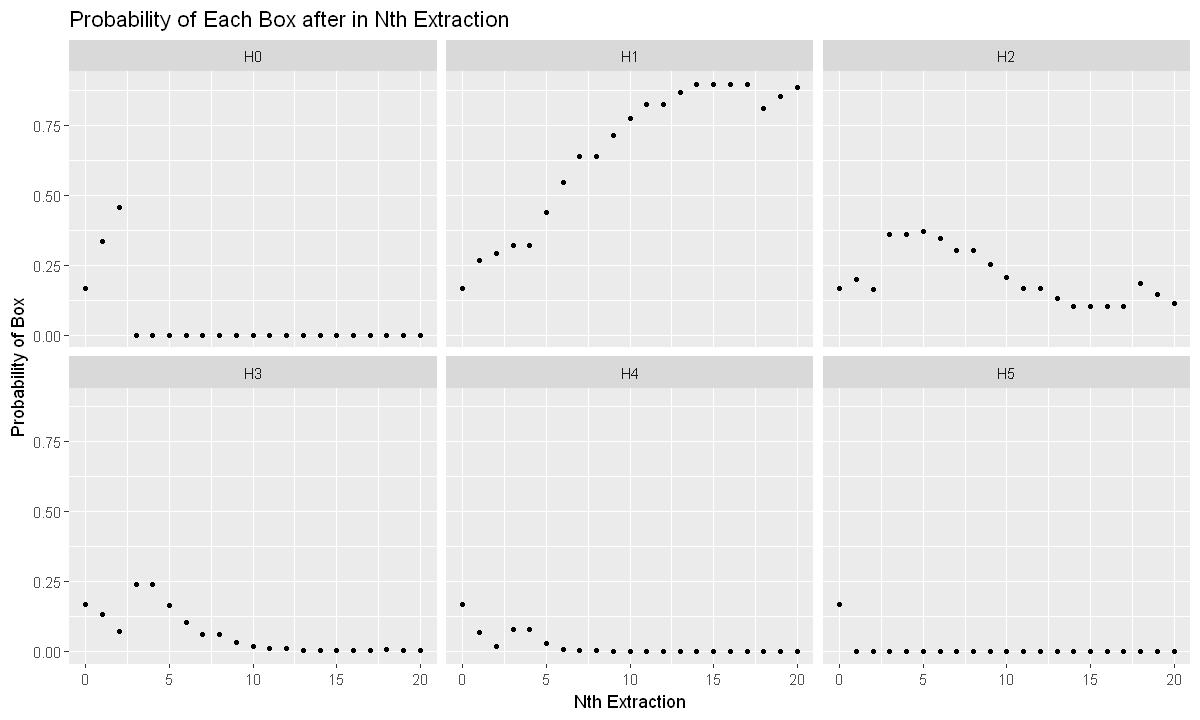

In [28]:
DF <- melt(df ,  id.vars = 'N', variable.name = 'series')  #reshaping the dataframe for plot purposes

options(repr.plot.width=10, repr.plot.height =6)  #changing size of plots
ggplot(data = DF, aes(x = N, y = value)) +
    geom_point(size=1) +
    facet_wrap(facets = vars(series))+
    labs(title = "Probability of Each Box after in Nth Extraction",
         x = "Nth Extraction",
         y = "Probability of Box")

## Exercise 5 - Six Boxes Toy Model : simulation

In [29]:
df    <- data.frame(N=0, H0=1/6 , H1=1/6 , H2=1/6 , H3=1/6 , H4=1/6 , H5=1/6)
prob  <- rep(1/6, 6)
j     <- c(0,1,2,3,4,5)
N     <- 0  #counting the number of tries

selected.box <- sample(j, 1)
box <- append(box, rep('white', selected.box))
box <- append(box, rep('black', 5-selected.box))

for (i in seq(1,20)){
    
    color <- sample(box, 1) #color of the extracted stone

    if      (color == 'white'){prob <- (j/5 * prob)/sum(j/5 * prob)}
    else if (color == 'black'){prob <- ((5-j)/5) * prob / sum(((5-j)/5) *prob)}
    
    N <- N+1
    df[nrow(df) + 1,1:7] <- c(N,prob)}

In [30]:
head(df)

N,H0,H1,H2,H3,H4,H5
0,0.1666667,0.1666667,0.1666667,0.1666667,0.16666667,0.1666667
1,0.3333333,0.2666667,0.2000000,0.1333333,0.06666667,0.0000000
2,0.0000000,0.2000000,0.3000000,0.3000000,0.20000000,0.0000000
3,0.0000000,0.0800000,0.2400000,0.3600000,0.32000000,0.0000000
4,0.0000000,0.1538462,0.3461538,0.3461538,0.15384615,0.0000000
5,0.0000000,0.2461538,0.4153846,0.2769231,0.06153846,0.0000000


In [31]:
tail(df, n= 1) #printing the final set of values

,N,H0,H1,H2,H3,H4,H5
21,20,0,0.1337278,0.7229457,0.1428041,0.0005223744,0


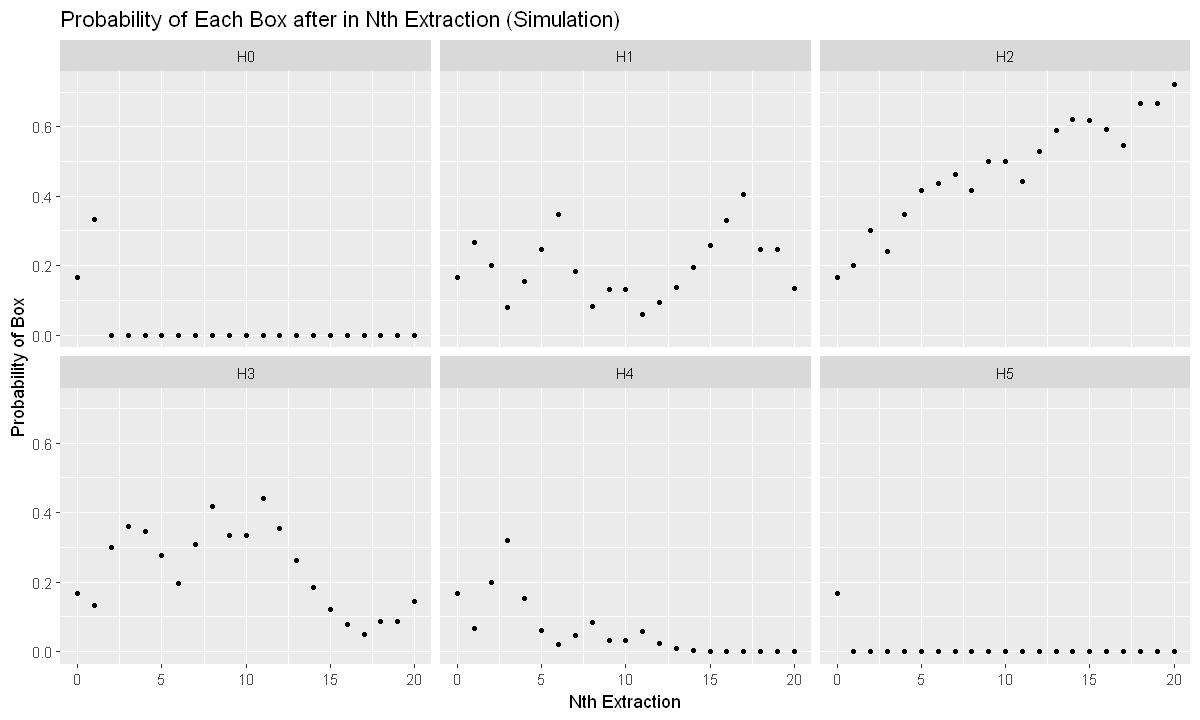

In [32]:
DF <- melt(df ,  id.vars = 'N', variable.name = 'series')  #reshaping the dataframe for plot purposes

options(repr.plot.width=10, repr.plot.height =6)  #changing size of plots
ggplot(data = DF, aes(x = N, y = value)) +
    geom_point(size=1) +
    facet_wrap(facets = vars(series))+
    labs(title = "Probability of Each Box after in Nth Extraction (Simulation)",
         x = "Nth Extraction",
         y = "Probability of Box")